In [1]:
import pandas as pd
titanic = pd.read_csv('/Datasets/Titanic/train.csv')
titanic.info()
titanic.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Cleaning Data**

In [2]:
# Remove PassengerID, Name, Ticket and Cabin as these features are not as useful
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [3]:
# Fill in missing values: Age (median) and Embarked (mode)
titanic['Age'].fillna((titanic['Age'].median()), inplace=True)
mode = titanic['Embarked'].value_counts().index[0]
titanic.loc[pd.isnull(titanic['Embarked']), 'Embarked'] = mode

In [4]:
# Cast categorical features to categorical
titanic['Survived'] = pd.Categorical(titanic.Survived)
titanic['Pclass'] = pd.Categorical(titanic.Pclass)
titanic['Embarked'] = pd.Categorical(titanic.Embarked)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    object  
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    category
dtypes: category(3), float64(2), int64(2), object(1)
memory usage: 37.8+ KB


**Build Desicion Tree Model**

In [6]:
# Randomly selecting training set (70%) and testing set data (30%)
titanic_train = titanic.sample(frac=0.7, random_state=1)
titanic_test = titanic.loc[~titanic.set_index(list(titanic.columns)).index.isin(titanic_train.set_index(list(titanic_train.columns)).index)]
print('Training set', titanic_train.shape)
print('Testing set', titanic_test.shape)

Training set (624, 8)
Testing set (216, 8)


In [7]:
# Build decision tree object
from sklearn.tree import DecisionTreeClassifier
titanic_train_survived_Y = titanic_train['Survived']
titanic_train_X = pd.get_dummies(titanic_train.loc[:, ~titanic_train.columns.isin(['Survived'])])
titanic_test_survived_Y = titanic_test['Survived']
titanic_test_X = pd.get_dummies(titanic_test.loc[:, ~titanic_test.columns.isin(['Survived'])])
titanic_dt = DecisionTreeClassifier(random_state=1).fit(titanic_train_X, titanic_train_survived_Y)

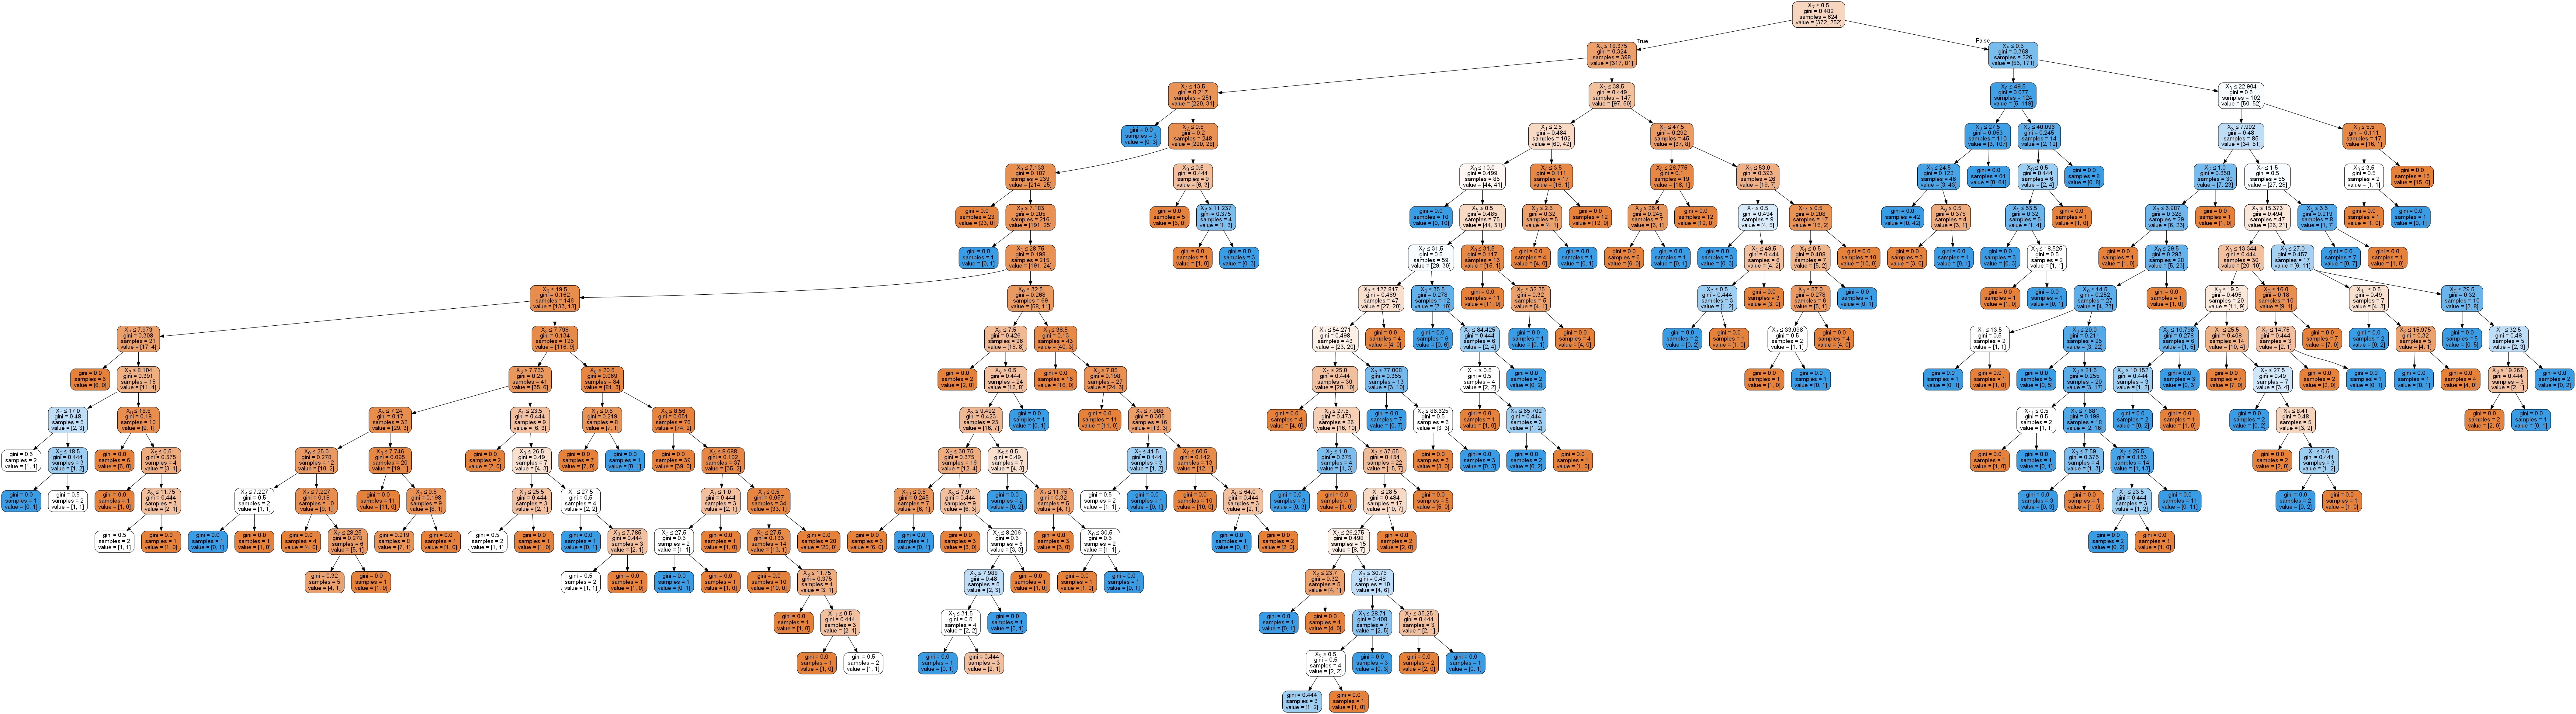

In [8]:
# Examine the tree
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
%matplotlib inline

import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

dot_data = StringIO()
export_graphviz(titanic_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Model Evaluation**

In [9]:
predictions = titanic_dt.predict(titanic_test_X) 

# Build the confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(titanic_test_survived_Y,predictions)
print(cm)

[[101  34]
 [ 25  56]]


In [10]:
# Accuracy
accuracy = metrics.accuracy_score(titanic_test_survived_Y, predictions)
print(accuracy)

0.7268518518518519


In [11]:
# Precision
precision = metrics.precision_score(titanic_test_survived_Y,predictions)
print('Precision', precision)

Precision 0.6222222222222222


In [12]:
# Recall
recall = metrics.recall_score(titanic_test_survived_Y,predictions)
print('Recall', recall)

Recall 0.691358024691358


In [13]:
# F1 score
f1 = metrics.f1_score(titanic_test_survived_Y,predictions)
print('F1-Score', f1)

F1-Score 0.6549707602339181


**Tuning Max Tree Depth**

In [14]:
titanic_model_maxdepth10 = DecisionTreeClassifier(max_depth=10).fit(titanic_train_X, titanic_train_survived_Y)
titanic_model_maxdepth7 = DecisionTreeClassifier(max_depth=7).fit(titanic_train_X, titanic_train_survived_Y)
titanic_model_maxdepth2 = DecisionTreeClassifier(max_depth=2).fit(titanic_train_X, titanic_train_survived_Y)

In [15]:
# How does max depth of 10 affect the accuracy?
titanic_predictions_maxdepth10 = titanic_model_maxdepth10.predict(titanic_test_X)
titanic_accuracy_maxdepth10 = metrics.accuracy_score(titanic_test_survived_Y, titanic_predictions_maxdepth10)
print(titanic_accuracy_maxdepth10)

0.7870370370370371


In [16]:
# How does max depth of 7 affect the accuracy?
titanic_predictions_maxdepth7 = titanic_model_maxdepth7.predict(titanic_test_X)
titanic_accuracy_maxdepth7 = metrics.accuracy_score(titanic_test_survived_Y, titanic_predictions_maxdepth7)
print(titanic_accuracy_maxdepth7)

0.7777777777777778


In [17]:
# How does max depth of 2 affect the accuracy?
titanic_predictions_maxdepth2 = titanic_model_maxdepth2.predict(titanic_test_X)
titanic_accuracy_maxdepth2 = metrics.accuracy_score(titanic_test_survived_Y, titanic_predictions_maxdepth2)
print(titanic_accuracy_maxdepth2)

0.7777777777777778


**Tuning Min Samples per Split**

In [18]:
titanic_model_minsamples100 = DecisionTreeClassifier(min_samples_split=100).fit(titanic_train_X, titanic_train_survived_Y)
titanic_model_minsamples50 = DecisionTreeClassifier(min_samples_split=50).fit(titanic_train_X, titanic_train_survived_Y)
titanic_model_minsamples2 = DecisionTreeClassifier(min_samples_split=2).fit(titanic_train_X, titanic_train_survived_Y)

In [19]:
# How does min samples split of 100 affect the accuracy?
titanic_predictions_minsamples100 = titanic_model_minsamples100.predict(titanic_test_X)
titanic_accuracy_minsamples100 = metrics.accuracy_score(titanic_test_survived_Y, titanic_predictions_minsamples100)
print(titanic_accuracy_minsamples100)

0.8055555555555556


In [20]:
# How does min samples split of 50 affect the accuracy?
titanic_predictions_minsamples50 = titanic_model_minsamples50.predict(titanic_test_X)
titanic_accuracy_minsamples50 = metrics.accuracy_score(titanic_test_survived_Y, titanic_predictions_minsamples50)
print(titanic_accuracy_minsamples50)

0.7916666666666666


In [21]:
# How does min samples split of 2 affect the accuracy?
titanic_predictions_minsamples2 = titanic_model_minsamples2.predict(titanic_test_X)
titanic_accuracy_minsamples2 = metrics.accuracy_score(titanic_test_survived_Y, titanic_predictions_minsamples2)
print(titanic_accuracy_minsamples2)

0.7314814814814815


**Tuning Min Samples per Leaf Node**

In [22]:
titanic_model_minsamplesleaf100 = DecisionTreeClassifier(min_samples_leaf=100).fit(titanic_train_X, titanic_train_survived_Y)
titanic_model_minsamplesleaf50 = DecisionTreeClassifier(min_samples_leaf=50).fit(titanic_train_X, titanic_train_survived_Y)
titanic_model_minsamplesleaf2 = DecisionTreeClassifier(min_samples_leaf=2).fit(titanic_train_X, titanic_train_survived_Y)

In [23]:
# How does min samples leaf node of 100 affect the accuracy?
titanic_predictions_minsamplesleaf100 = titanic_model_minsamplesleaf100.predict(titanic_test_X)
titanic_accuracy_minsamplesleaf100 = metrics.accuracy_score(titanic_test_survived_Y, titanic_predictions_minsamplesleaf100)
print(titanic_accuracy_minsamplesleaf100)

0.7777777777777778


In [24]:
# How does min samples leaf node of 50 affect the accuracy?
titanic_predictions_minsamplesleaf50 = titanic_model_minsamplesleaf50.predict(titanic_test_X)
titanic_accuracy_minsamplesleaf50 = metrics.accuracy_score(titanic_test_survived_Y, titanic_predictions_minsamplesleaf50)
print(titanic_accuracy_minsamplesleaf50)

0.7824074074074074


In [25]:
# How does min samples leaf node of 2 affect the accuracy?
titanic_predictions_minsamplesleaf2 = titanic_model_minsamplesleaf2.predict(titanic_test_X)
titanic_accuracy_minsamplesleaf2 = metrics.accuracy_score(titanic_test_survived_Y, titanic_predictions_minsamplesleaf2)
print(titanic_accuracy_minsamplesleaf2)

0.7777777777777778


**Grid Search Hyperparameter Tuning**

In [26]:
import itertools

# Grid search across all possible hyperparameters
tune_grid = {
            'maxdepth' : [2,3,4],
            'minsplit' : [2,3,4,5],
            'minbucket' : [2,3,4,5],
            'accuracy' : [0.00]
}

order = tune_grid.keys()
tune_grid2 = pd.DataFrame(itertools.product(*[tune_grid[k] for k in order]), columns=order)

print(tune_grid2)

    maxdepth  minsplit  minbucket  accuracy
0          2         2          2       0.0
1          2         2          3       0.0
2          2         2          4       0.0
3          2         2          5       0.0
4          2         3          2       0.0
5          2         3          3       0.0
6          2         3          4       0.0
7          2         3          5       0.0
8          2         4          2       0.0
9          2         4          3       0.0
10         2         4          4       0.0
11         2         4          5       0.0
12         2         5          2       0.0
13         2         5          3       0.0
14         2         5          4       0.0
15         2         5          5       0.0
16         3         2          2       0.0
17         3         2          3       0.0
18         3         2          4       0.0
19         3         2          5       0.0
20         3         3          2       0.0
21         3         3          

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree

for i in range(0,len(tune_grid2)):
    titanic_model = DecisionTreeClassifier(max_depth=tune_grid2.iloc[i,0], min_samples_split=tune_grid2.iloc[i,1], min_samples_leaf=tune_grid2.iloc[i,2]).fit(titanic_train_X, titanic_train_survived_Y)
    titanic_predictions = titanic_model.predict(titanic_test_X)
    titanic_accuracy = metrics.accuracy_score(titanic_test_survived_Y, titanic_predictions)
    tune_grid2.iloc[i,3] = titanic_accuracy

print(tune_grid2)

    maxdepth  minsplit  minbucket  accuracy
0          2         2          2  0.777778
1          2         2          3  0.777778
2          2         2          4  0.777778
3          2         2          5  0.777778
4          2         3          2  0.777778
5          2         3          3  0.777778
6          2         3          4  0.777778
7          2         3          5  0.777778
8          2         4          2  0.777778
9          2         4          3  0.777778
10         2         4          4  0.777778
11         2         4          5  0.777778
12         2         5          2  0.777778
13         2         5          3  0.777778
14         2         5          4  0.777778
15         2         5          5  0.777778
16         3         2          2  0.805556
17         3         2          3  0.805556
18         3         2          4  0.805556
19         3         2          5  0.787037
20         3         3          2  0.805556
21         3         3          

In [28]:
# Select the tuned model with highest accuracy
best_tuned_params = pd.DataFrame(tune_grid2.loc[tune_grid2['accuracy'].idxmax()])
print(best_tuned_params)

                 16
maxdepth   3.000000
minsplit   2.000000
minbucket  2.000000
accuracy   0.805556


In [29]:
# Build best tuned model
maxdepth = int(best_tuned_params.iloc[0,0])
minsplit = int(best_tuned_params.iloc[1,0])
minbucket = int(best_tuned_params.iloc[2,0])
titanic_best_tuned_model = DecisionTreeClassifier(max_depth=maxdepth, min_samples_split=minsplit, min_samples_leaf=minbucket).fit(titanic_train_X, titanic_train_survived_Y)